# Numpy 高级教程

## 1.堆叠

### 任务描述

根据相关知识，实现均值统计功能。

### 相关知识

#### stack

stack的意思是堆叠的意思，所谓的堆叠就是将两个ndarray对象堆叠在一起组合成一个新的ndarray对象。根据堆叠的方向不同分为hstack以及vstack两种。

##### hstack

将两个表格（二维数组）在水平方向上堆叠在一起组合起来，拼接成一个新的表格（二维数组）。像这种行为称之为hstack（horizontal stack）

NumPy提供了实现hstack功能的函数叫hstack，hstack的使用套路代码如下：

In [3]:
import numpy as np

a = np.array([[8, 8], [0, 0]])
b = np.array([[1, 8], [0, 4]])

np.hstack((a,b))

array([[8, 8, 1, 8],
       [0, 0, 0, 4]])

##### vstack

将两个表格（二维数组）在竖直方向上堆叠在一起组合起来，拼接成一个新的表格（二维数组）。像这种行为称之为vstack（vertical stack）

NumPy提供了实现vstack功能的函数叫vstack，vstack的使用套路代码如下：

In [4]:
import numpy as np
a = np.array([[8, 8], [0, 0]])
b = np.array([[1, 8], [0, 4]])

np.vstack((a,b))

array([[8, 8],
       [0, 0],
       [1, 8],
       [0, 4]])

In [5]:
c = np.array([[1, 2], [3, 4]])
np.vstack((a,b,c))

array([[8, 8],
       [0, 0],
       [1, 8],
       [0, 4],
       [1, 2],
       [3, 4]])

### 实操练习

#### 编程说明

根据上述所学知识，补充完成get_mean(featur1, feature2)函数中Begin-End之间的代码，其中：

- feature1：待hstack的ndarray；
- feature2：待hstack的ndarray；
- 返回值：类型为ndarray，其中值为hstack后每列的平均值；

具体要求请参见后续测试用例

#### 测试用例

只需按要求完成函数即可。

测试用例输入是一个字典，feature1部分代表函数中的feature1，feature2部分代表函数中的feature2。

预期输出：
`[2.33333333 2.66666667 3.         3.33333333 2.        ]`

In [26]:
# 测试输入：
input_data = {
    'feature1':[[1, 2, 3, 4], [4, 3, 2, 1], [2, 3, 4, 5]], 
    'feature2':[[1], [2], [3]]
}

In [28]:
import numpy as np
def get_mean(feature1, feature2):
    '''
    将feature1和feature2横向拼接，然后统计拼接后的ndarray中每列的均值
    :param feature1:待`hstack`的`ndarray`
    :param feature2:待`hstack`的`ndarray`
    :return:类型为`ndarray`，其中的值`hstack`后每列的均值
    '''
    #********* Begin *********#
    return np.hstack((feature1, feature2)).mean(axis=0)
    #********* End *********# 
    
print(get_mean(input_data['feature1'],input_data['feature2']))

[2.33333333 2.66666667 3.         3.33333333 2.        ]


## 2. 比较、掩码和布尔逻辑

### 任务描述

编写一个能比较并筛选数据的程序。

### 相关知识
为了完成本关任务，你需要掌握：

1. 如何对numpy进行比较运算；
2. 如何使用逻辑数组。

#### 比较

在许多情况下，数据集可能不完整或因无效数据的存在而受到污染。我们要基于某些准则来抽取、修改、计数或对一个数组中的值进行其他操作时，就需要掩码了。接下来将学习如何用**布尔掩码**来查看和操作数组中的值。

和算术运算符一样，比较运算符在numpy中也是通过通用函数来实现的。比较运算符和其对应的通用函数如下：

| 比较运算符 | 通用函数 |
|:--:|:--| 
| == | np.equal |
| != | np.not_equal |
| < | np.less |
| <= | np.less_equal |
| > | np.greater |
| >= | np.greater_equal |

这些比较运算符通用函数可以用于任意形状、大小的数组。示例如下：

In [9]:
#构造结构化数组
data = np.array([
    ('Alice', 4, 40),
    ('Bob', 11, 85.5),
    ('Cathy', 7, 68.0),
    ('Doug', 9, 60)],
    dtype=[
        ("name","S10"),
        ("age","int"),
        ("score","float")]
)

data["age"]<10

array([ True, False,  True,  True])

In [10]:
data["score"]>60

array([False,  True,  True, False])

In [11]:
data["score"]>=60

array([False,  True,  True,  True])

In [12]:
data["score"]<=60

array([ True, False, False,  True])

In [13]:
data["age"]!=9

array([ True,  True,  True, False])

In [14]:
data["age"]/2 ==np.sqrt(data["age"])

array([ True, False, False, False])

#### 布尔数组作掩码

一种更加强大的模式是使用布尔数组作为掩码，通过该掩码选择数据的子数据集，实现一些操作：

In [15]:
data["score"]>60

array([False,  True,  True, False])

In [16]:
data[data["score"]>60]

array([(b'Bob', 11, 85.5), (b'Cathy',  7, 68. )],
      dtype=[('name', 'S10'), ('age', '<i8'), ('score', '<f8')])

#### 布尔逻辑

结合Python的逐位逻辑运算符一起使用。逻辑运算符对应numpy中的通用函数如下表：

| 逻辑运算符 | 通用函数 |
|:--:|:-- |
| & | np.bitwise_and |
| \| | np.bitwise_or |
| ^ | np.bitwise_xor |
| ~ | np.bitwise_not |


In [17]:
# 是否有有不及格？
np.any(data["score"]<60)

True

In [18]:
# 是否都大于10岁？
np.all(data["age"]>10)

False

In [19]:
data[data["age"]>10]

array([(b'Bob', 11, 85.5)],
      dtype=[('name', 'S10'), ('age', '<i8'), ('score', '<f8')])

### 实操练习

#### 编程说明

请在下列代码的Begin-End处补充代码，根据输入的数据筛选出大于num的值。

具体要求请参见后续测试用例。

请先仔细阅读代码给出的代码框架，再开始你的编程工作！

#### 测试说明

测试输入：

In [22]:
input_data = [
    [ 3 ,15, 9 ,11 , 7],
    [ 2, 0 , 8, 19 ,16],
    [ 6 , 6, 16 , 9, 5],
    [ 7 , 5 , 2 , 6 ,13]
]
num = 10

预期输出：`[15 11 19 16 16 13]`

In [24]:
def student(num,input_data):
    result=[]
    # ********* Begin *********#
    data = np.array(input_data)  
    result = data[data>num]
    # ********* End *********#
    return result

print(student(num, input_data))

[15 11 19 16 16 13]


## 3.花式索引与布尔索引

### 任务描述

根据相关知识，过滤大写字母

### 相关知识

为了完成本任务，需要掌握：

- 花式索引；
- 布尔索引。

#### 花式索引

花式索引（Fancy Indexing）是NumPy用来描述使用整型数组（这里的数组，可以是NumPy的数组，也可以是python自带的list）作为索引的术语，其意义是根据索引数组的值作为目标数组的某个轴的下标来取值。

使用一维整型数组作为索引，如果被索引数组(ndarray)是一维数组，那么索引的结果就是对应位置的元素；如果被索引数组(ndarray)是二维数组，那么就是对应下标的行。如下图所示：

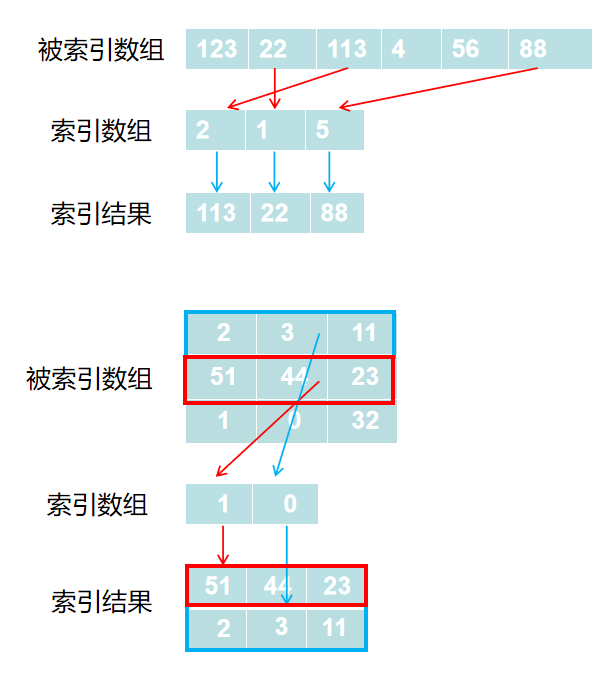

示例代码如下：

In [29]:
import numpy as np

arr = np.array(['zero','one','two','three','four'])

arr[[1,4]]

array(['one', 'four'], dtype='<U5')

In [30]:
arr = np.array([
    [1, 2, 3], 
    [4, 5, 6], 
    [7, 8, 9]
])

arr[[1, 0]]

array([[4, 5, 6],
       [1, 2, 3]])

In [31]:
arr[[1, 2],[0, 1]]

array([4, 8])

#### 布尔索引

可以通过一个布尔数组来索引目标数组，以此找出与布尔数组中值为True的对应的目标数组中的数据，从而达到筛选出想要的数据的功能。如下图所示：（PS：需要注意的是，**布尔数组的长度必须与被索引数组对应的轴的长度一致**）

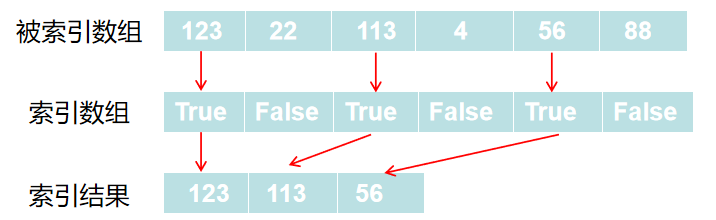

不过单纯的传入布尔数组进去有点蠢，有没有更加优雅的方式使用布尔索引来达到筛选数据的效果呢？当然有！我们可以想办法根据我们的需求，构造出布尔数组，然后再通过布尔索引来实现筛选数据的功能。

假设有公司员工绩效指数的数据如下（用一个一维的ndarray表示），现在想要把绩效指数大于3.5的筛选出来进行股权激励。

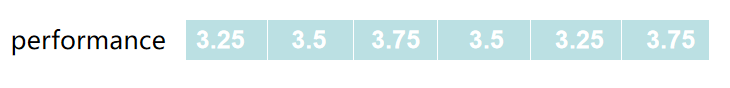

那首先就要构造出布尔数组，构造布尔数组很简单，performance > 3.5即可。此时会生成想要的布尔数组。

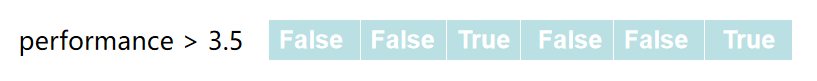

有了布尔数组就可以使用布尔索引来实现筛选数据的功能了。

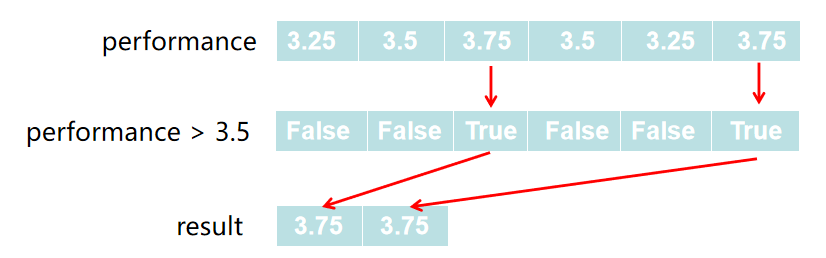

示例代码如下：

In [33]:
import numpy as np

performance = np.array([3.25, 3.5, 3.75, 3.5, 3.25, 3.75])
performance > 3.5

array([False, False,  True, False, False,  True])

In [34]:
performance[performance > 3.5]

array([3.75, 3.75])

In [35]:
performance[(performance > 3.25) & (performance < 4)]

array([3.5 , 3.75, 3.5 , 3.75])

### 实操练习

#### 编程要求

请在下列代码Begin-End处补充代码，根据函数参数input_data过滤出所有的大写字母。

具体要求请参见后续测试用例。

请先仔细阅读给出的代码框架，再开始你的编程工作！

#### 测试说明

测试输入：

In [36]:
input_data = ["d","a","A","p","b","I","C","K"]

预期输出：`['A' 'I' 'C' 'K']`

In [37]:
import numpy as np

def student(input_data):
    result=[]
    #********* Begin *********#
    data = np.array(input_data)
    result = data[(data>='A') & (data <='Z')]
    # ********* End *********#
    return result

print(student(input_data))

['A' 'I' 'C' 'K']


## 4.广播机制

### 任务描述

利用广播机制实现Z-score标准化。

### 相关知识

为了完成本任务，你需要掌握：

- 什么是广播
- 广播的原则

#### 什么是广播

两个ndarray对象的相加、相减以及相乘都是对应元素之间的操作：

In [38]:
import numpy as np
x = np.array([[2,2,3],[1,2,3]])
y = np.array([[1,1,3],[2,2,4]])
print(x * y)

[[ 2  2  9]
 [ 2  4 12]]


当两个ndarray对象的**形状并不相同**的时候，可以通过**扩展数组**的方法来实现相加、相减、相乘等操作，这种机制叫做**广播（broadcasting）**。

比如，一个二维的ndarray对象减去列平均值，来对数组的每一列进行取均值化处理：

In [47]:
import numpy as np

arr = np.random.randint(1,10,(2,3))
arr

array([[6, 4, 3],
       [2, 1, 3]])

In [48]:
# arr_mean为有3个元素的一维ndarray对象
arr_mean = arr.mean(axis=0)
arr_mean

array([4. , 2.5, 3. ])

In [49]:
# 对arr的每一列进行
arr - arr_mean

array([[ 2. ,  1.5,  0. ],
       [-2. , -1.5,  0. ]])

In [50]:
arr.shape, arr_mean.shape

((2, 3), (3,))

很明显上面代码中的arr和arr_mean维度并不形同，但是它们可以进行相减操作，这就是通过广播机制来实现的。

#### 广播的原则

**广播的原则**：如果两个数组的后缘维度（trailing dimension，即从末尾开始算起的维度）的轴长度相符，或其中的一方的长度为1，则认为它们是**广播兼容**的。**广播会在缺失或长度为1的维度上进行**，这句话是理解广播的核心。

广播主要发生在两种情况，一种是两个数组的维数不相等，但是它们的后缘维度的轴长相符，另外一种是有一方的长度为1。

In [52]:
import numpy as np

arr1 = np.array([[0, 0, 0],[1, 1, 1],[2, 2, 2], [3, 3, 3]])
arr2 = np.array([1, 2, 3])

arr1, arr2

(array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]),
 array([1, 2, 3]))

In [53]:
arr_sum = arr1 + arr2
arr_sum

array([[1, 2, 3],
       [2, 3, 4],
       [3, 4, 5],
       [4, 5, 6]])

arr1的shape为(4,3)，arr2的shape为(3,)。可以说前者是二维的，而后者是一维的。但是它们的后缘维度相等，arr1的第二维长度为3，和arr2的维度相同。

arr1和arr2的shape并不一样，但是它们可以执行相加操作，这就是通过广播完成的，在这个例子当中是将arr2沿着0轴进行扩展。

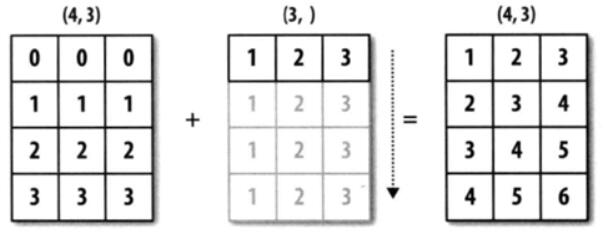

再看一个例子：

In [57]:
import numpy as np

arr1 = np.array([[0, 0, 0],[1, 1, 1],[2, 2, 2], [3, 3, 3]])
arr1, arr1.shape

(array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2],
        [3, 3, 3]]),
 (4, 3))

In [58]:
arr2 = np.array([[1],[2],[3],[4]])
arr2, arr2.shape

(array([[1],
        [2],
        [3],
        [4]]),
 (4, 1))

In [59]:
arr_sum = arr1 + arr2
arr_sum

array([[1, 1, 1],
       [3, 3, 3],
       [5, 5, 5],
       [7, 7, 7]])

arr1的shape为(4,3)，arr2的shape为(4,1)，它们都是二维的，但是第二个数组在1轴上的长度为1，所以，可以在1轴上面进行广播。

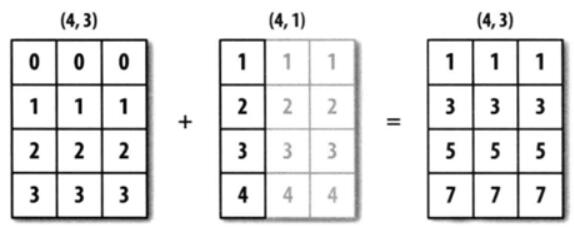

### 实操练习

#### 编程要求

请在下列代码的Begin-End处补充代码，将输入数据转换为array并计算它们的和。

具体要求请参见后续测用例。

请先仔细阅读给出的代码框架，再开始你的编程工作！

#### 测试说明

测试输入：

In [60]:
a = [[9, 3, 1], [7, 0, 6], [4, 6, 3]] 
b = [1, 5, 9] 
c = [[9], [6], [7]]

预期输出：
```
[[19 17 19]
 [14 11 21]
 [12 18 19]]
```

In [63]:
def student(a,b,c):
    result=[]
    # ********* Begin *********#
    a = np.array(a)
    b = np.array(b)
    c = np.array(c)
    result = a + b + c
    # ********* End *********#
    return result

print(student(a,b,c))

[[19 17 19]
 [14 11 21]
 [12 18 19]]


## 5.线性代数

### 任务描述

编写一个能求解线性方程的函数。

### 相关知识

为了完成本任务，需要掌握：

1. 如何使用numpy进行矩阵运算
2. 点积和matmul的区别

#### numpy的线性代数

线性代数（如矩阵乘法、矩阵分解、行列式以及其他方阵数学等）是任何数组库的重要组成部分，一般使用\*对两个二维数组相乘得到的是一个元素级的积，而不是一个矩阵点积。因此numpy提供了线性代数函数库linalg，该库包含了线性代数所需的所有功能。

##### 常用的numpy.linalg函数：

| 函数 | 说明 |
|:--|:--|
|dot | 矩阵乘法 |
| vdot | 两个向量的点积 |
| det | 计算矩阵的行列式 |
| inv | 计算方阵的逆 |
| svd | 计算奇异值分解（SVD）|
| solve | 解线性方程组 Ax=b，A是一个方阵|
| matmul | 两个数组的矩阵积 |

##### 常用函数

- **dot()**：该函数返回俩个数组的点积。对于二维向量，效果等于矩阵乘法；对于一维数组，它是向量的内积；对于N维数组，它是a的最后一个轴上的和与b的倒数第二个轴的乘积。

In [75]:
import numpy as np

a=np.array([[1, 2],[3, 4]])
a1=np.array([[5, 6],[7, 8]])

np.dot(a,a1)

array([[19, 22],
       [43, 50]])

- **det()**：该函数用于计算输入矩阵的行列式

In [68]:
a = np.array([[14, 1], [6, 2]])
a = np.linalg.det(a)
a

21.999999999999996

- **inv()**：该函数用于计算方阵的逆矩阵。逆矩阵的定义维如果两个方阵A、B，使得AB = BA = E，则A称为可逆矩阵，B为A的逆矩阵，E为单位矩阵。

In [69]:
a=np.array([[1, 2],[3, 4]])
b=np.linalg.inv(a)

np.dot(a,b)

array([[1.0000000e+00, 0.0000000e+00],
       [8.8817842e-16, 1.0000000e+00]])

- **solve()**：该函数用于计算线性方程组的解。

假设有方程组：$\begin{cases}3x+2y=7\\x+4y=14\end{cases}$

写成矩阵的形式：$ \begin{bmatrix}3&2\\1&4\\\end{bmatrix} \times \begin{bmatrix}x\\y\\\end{bmatrix} = \begin{bmatrix}7\\14\\\end{bmatrix}$

解如上方程组代码如下：

In [71]:
a = np.array([[3, 2], [1, 4]])
b = np.array([[7],[14]])

np.linalg.solve(a,b)

array([[0. ],
       [3.5]])

- **matmul()**：返回两个数组的矩阵乘积。如果参数中有一维数组，则通过在其维度上附加1来提升为矩阵，并在乘法之后去除。

In [72]:
a = [[3, 4],[5, 6]]
b = [[7, 8],[9, 10]]

np.matmul(a, b)

array([[ 57,  64],
       [ 89, 100]])

In [73]:
b = [7,8]
np.matmul(a, b)

array([53, 83])

- **svd()**：奇异值分解是一种矩阵分解的方法，该函数用来求解SVD

In [74]:
a = [[0, 1],[1, 1],[1, 0]]

np.linalg.svd(a)

(array([[-0.40824829,  0.70710678,  0.57735027],
        [-0.81649658,  0.        , -0.57735027],
        [-0.40824829, -0.70710678,  0.57735027]]),
 array([1.73205081, 1.        ]),
 array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]))

### 实操练习

#### 编程要求

请在下列Begin-End处补充代码，计算性别为男的线性方程解，前两个数为方程左边，最后一个数为方程右边。

具体要求请参见后续测试用例。
请先仔细阅读给出的代码框架，再开始你的编程工作！

#### 测试说明

测试输入：

In [76]:
input_data = [
    ["男",2,4,40],
    ["女",8,3,17],
    ["男",8,6,24]
]

预期输出：`[[-7.2][13.6]]`

提示：测试数据的方程为2x+4y=40，8x+6y=24。

In [77]:
from numpy import linalg
import numpy as np

def student(input_data):
    '''
    将输入数据筛选性别为男，再进行线性方程求解
    :param input_data:类型为`list`的输入数据
    :return:类型为`ndarray`
    '''
    result=[]
    # ********* Begin *********#
    a = np.array(input_data)
    x = []
    y = []
    
    for i in a:
        if i[0]=="男":
            x.append([int(i[1]),int(i[2])])
            y.append([int(i[-1])])
    
    if x == [] and y == []:
        return result
    
    x = np.array(x)
    y = np.array(y)
    result=linalg.solve(x,y)
    # ********* End *********#
    return result

print(student(input_data))

[[-7.2]
 [13.6]]
